<a href="https://colab.research.google.com/github/Asoub2001/customer-churn-prediction-r/blob/main/Main_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("e1071")         # caret dependency
install.packages("randomForest")  # Used separately
install.packages("xgboost")
install.packages("Matrix")
install.packages("MLmetrics")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("xgboost"):
“installation of package ‘xgboost’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("Matrix"):
“installation of package ‘Matrix’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("MLmetrics"):
“installation of package ‘MLmetrics’ had non-zero exit status”


In [6]:
# Prompt user to upload the CSV file
library(readr)

telco_data <- read_csv("/bin/WA_Fn-UseC_-Telco-Customer-Churn.csv")


Rows: 7043 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# View structure
str(telco_data)

# Summary statistics
summary(telco_data)

# View first few rows
head(telco_data)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




spc_tbl_ [7,043 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7043] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7043] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7043] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7043] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7043] "No" "No" "No" "No" ...
 $ tenure          : num [1:7043] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7043] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7043] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7043] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7043] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7043] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7043] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7043] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7043] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7043] "

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [8]:
# Check for NA values
colSums(is.na(telco_data))

# Remove rows with NA in 'TotalCharges'
telco_data <- telco_data[!is.na(telco_data$TotalCharges), ]


customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [9]:
# Convert character columns to factors
telco_data <- telco_data %>%
  mutate_if(is.character, as.factor)

# Convert SeniorCitizen to factor (0/1 → No/Yes)
telco_data$SeniorCitizen <- as.factor(telco_data$SeniorCitizen)


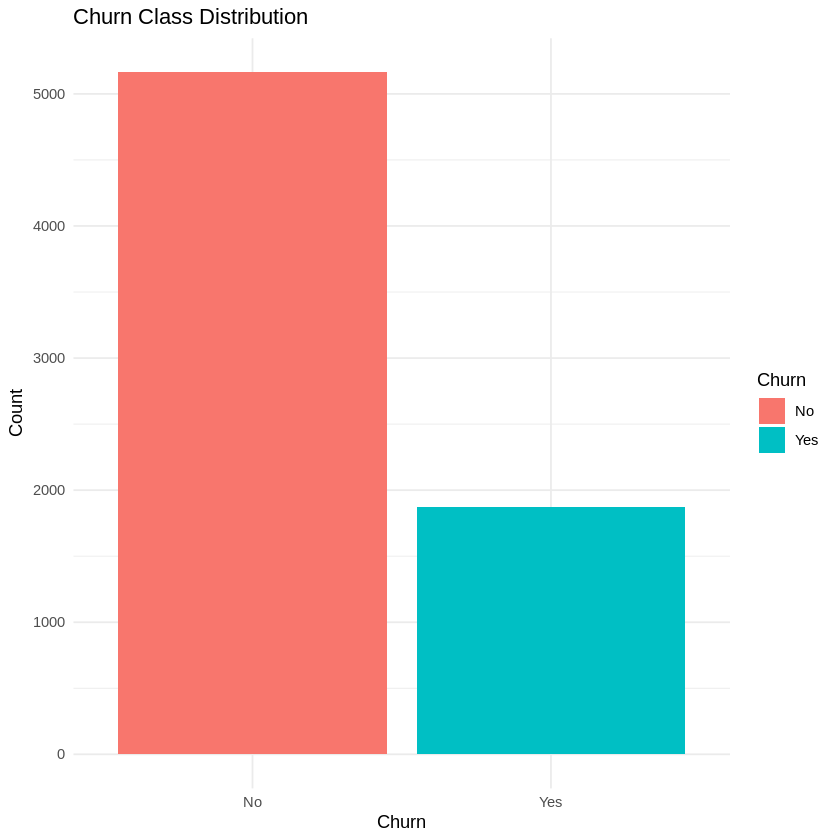

In [10]:
ggplot(telco_data, aes(x = Churn, fill = Churn)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Churn Class Distribution", x = "Churn", y = "Count")


In [11]:
install.packages("caret")
library(caret)
# Set seed for reproducibility
set.seed(123)

# Split the data (80% training, 20% test)
train_index <- createDataPartition(telco_data$Churn, p = 0.8, list = FALSE)
train_data <- telco_data[train_index, ]
test_data <- telco_data[-train_index, ]




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [12]:
install.packages("glmnet")
library(glmnet)

# Convert to matrix form
x_train <- model.matrix(Churn ~ . -1, data = train_data)
y_train <- ifelse(train_data$Churn == "Yes", 1, 0)

# Train logistic regression with L2 regularization
lognet <- glmnet(x_train, y_train, family = "binomial")

# Predict
x_test <- model.matrix(Churn ~ . -1, data = test_data)
log_preds <- predict(lognet, newx = x_test, s = 0.01, type = "response")
log_preds_class <- ifelse(log_preds > 0.5, "Yes", "No")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-9



In [13]:
library(randomForest)

# Identify and remove columns with more than 53 unique levels
# Check unique levels for each factor column
factor_cols <- sapply(train_data, is.factor)
for (col_name in names(train_data)[factor_cols]) {
  if (nlevels(train_data[[col_name]]) > 53) {
    cat("Removing column:", col_name, "due to too many levels (", nlevels(train_data[[col_name]]), ")\n")
    train_data <- train_data %>% select(-one_of(col_name))
    test_data <- test_data %>% select(-one_of(col_name))
  }
}

# Train Random Forest model
rf_model <- randomForest(Churn ~ ., data = train_data, ntree = 100)

# Predict on test data
rf_preds <- predict(rf_model, newdata = test_data)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Removing column: customerID due to too many levels ( 7032 )


In [14]:
library(xgboost)

# Convert data to matrix format for xgboost
library(Matrix)

# Remove the target from features and convert to numeric matrix
train_matrix <- model.matrix(Churn ~ . -1, data = train_data)
test_matrix <- model.matrix(Churn ~ . -1, data = test_data)

# Encode target variable as numeric
train_label <- ifelse(train_data$Churn == "Yes", 1, 0)
test_label <- ifelse(test_data$Churn == "Yes", 1, 0)

# Train XGBoost
xgb_model <- xgboost(data = train_matrix, label = train_label, nrounds = 100,
                     objective = "binary:logistic", verbose = 0)

# Predict
xgb_preds <- predict(xgb_model, newdata = test_matrix)
xgb_preds_class <- ifelse(xgb_preds > 0.5, "Yes", "No")
xgb_preds_class <- as.factor(xgb_preds_class)



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




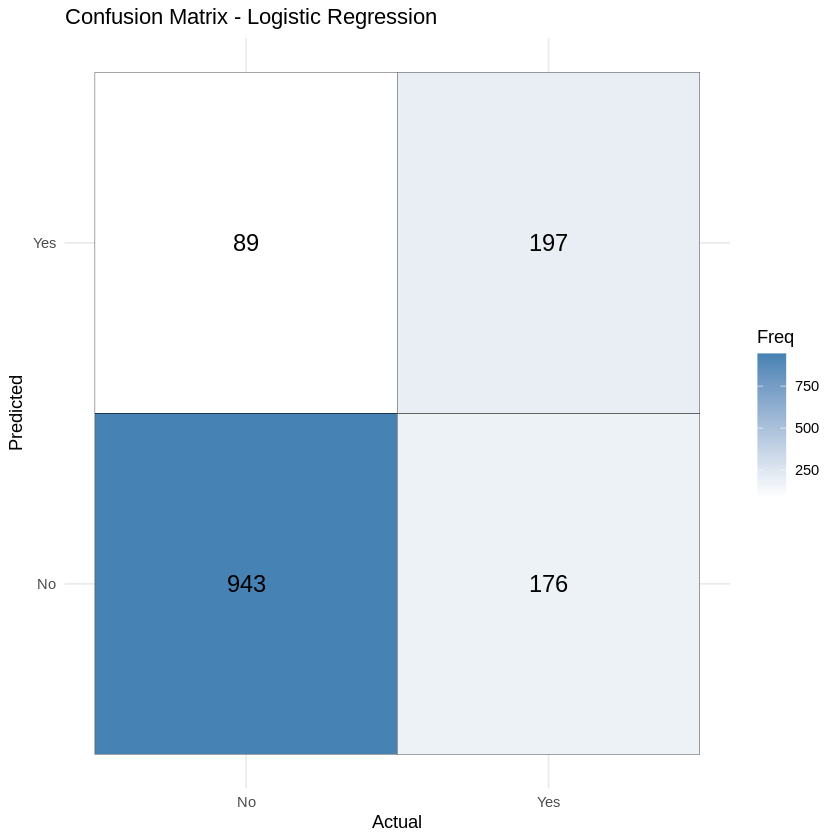

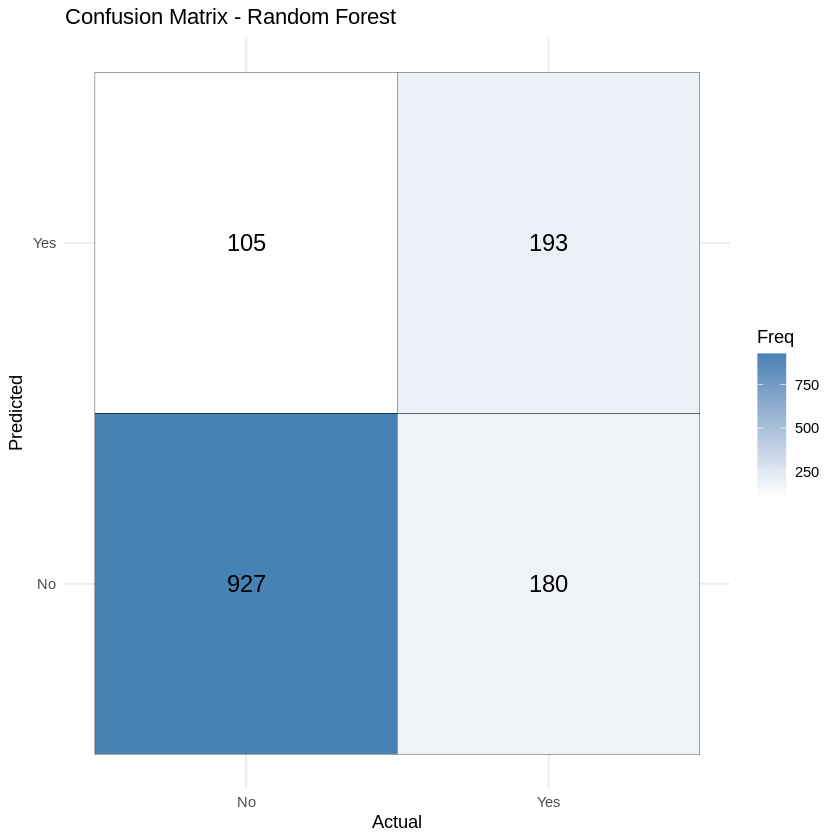

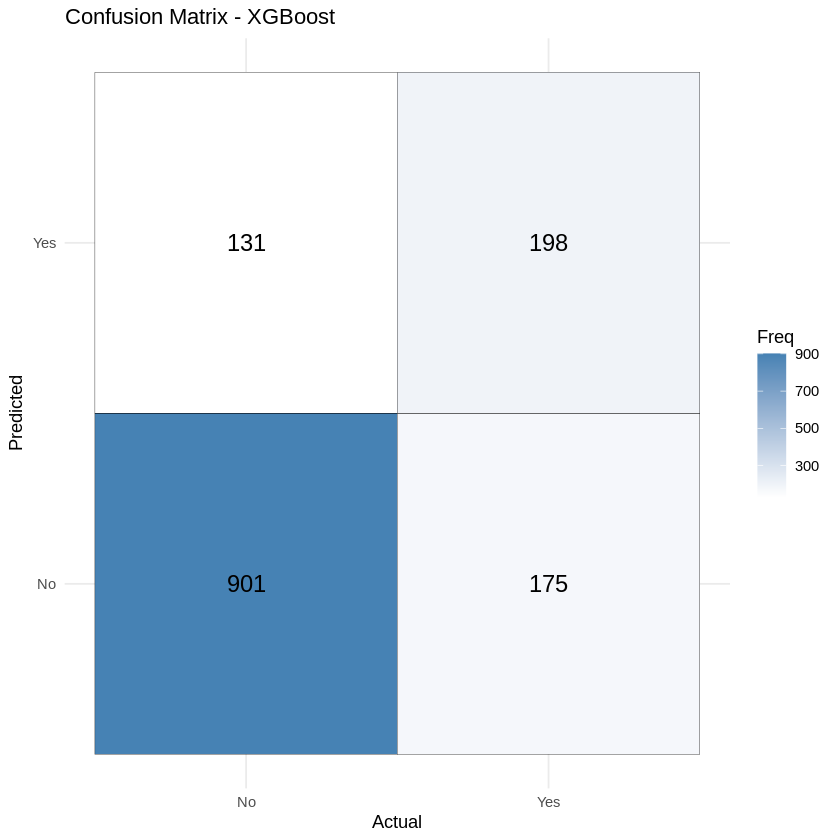

In [21]:
# Helper function to create confusion matrix plot
plot_conf_matrix <- function(cm, title) {
  cm_table <- as.table(cm$table)
  df <- as.data.frame(cm_table)
  colnames(df) <- c("Prediction", "Reference", "Freq")

  ggplot(df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile(color = "black") +
    geom_text(aes(label = Freq), size = 5) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = title, x = "Actual", y = "Predicted") +
    theme_minimal()
}

# Re-level predictions to match factor levels
log_preds_class <- factor(log_preds_class, levels = levels(test_data$Churn))
xgb_preds_class <- factor(xgb_preds_class, levels = levels(test_data$Churn))

# Generate confusion matrices
cm_log <- confusionMatrix(log_preds_class, test_data$Churn, positive = "Yes")
cm_rf  <- confusionMatrix(rf_preds, test_data$Churn, positive = "Yes")
cm_xgb <- confusionMatrix(xgb_preds_class, test_data$Churn, positive = "Yes")

# Plot them
plot_conf_matrix(cm_log, "Confusion Matrix - Logistic Regression")
plot_conf_matrix(cm_rf,  "Confusion Matrix - Random Forest")
plot_conf_matrix(cm_xgb, "Confusion Matrix - XGBoost")




Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




                Model  F1_Score
1 Logistic Regression 0.5978756
2       Random Forest 0.5752608
3             XGBoost 0.5641026


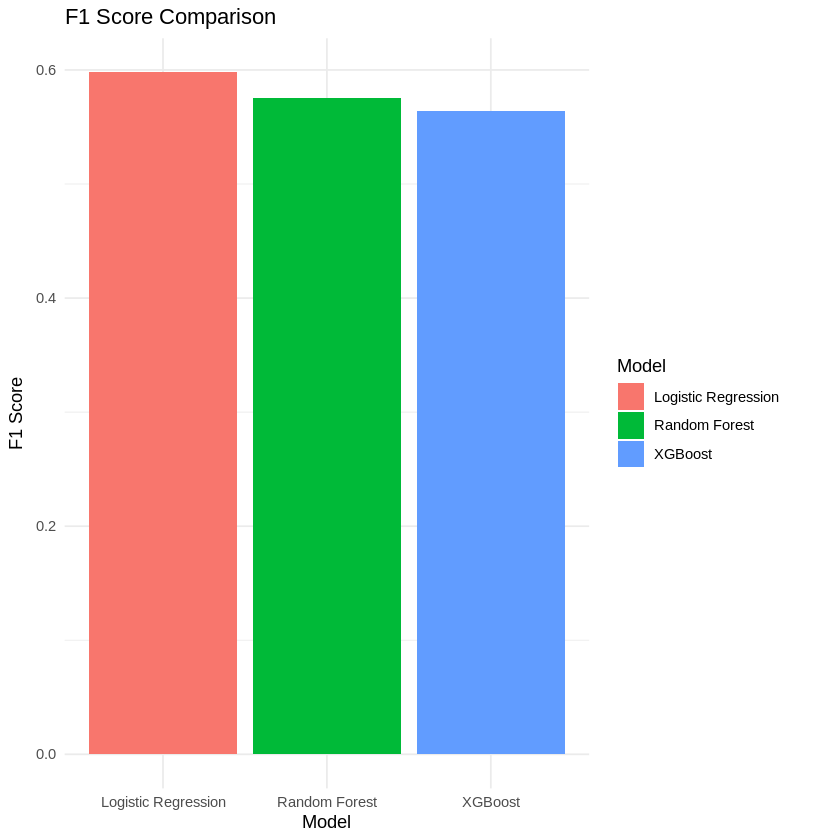

In [16]:
# Load MLmetrics for F1 Score
library(MLmetrics)

# Compute F1 scores
f1_log <- F1_Score(y_pred = log_preds_class, y_true = test_data$Churn, positive = "Yes")
f1_rf <- F1_Score(y_pred = rf_preds, y_true = test_data$Churn, positive = "Yes")
f1_xgb <- F1_Score(y_pred = xgb_preds_class, y_true = test_data$Churn, positive = "Yes")

# Create a dataframe to summarize
results <- data.frame(
  Model = c("Logistic Regression", "Random Forest", "XGBoost"),
  F1_Score = c(f1_log, f1_rf, f1_xgb)
)

print(results)

# Plot
ggplot(results, aes(x = Model, y = F1_Score, fill = Model)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "F1 Score Comparison", y = "F1 Score", x = "Model")


In [17]:
library(caret)
cat("=== Logistic Regression ===\n")
cm_log <- confusionMatrix(log_preds_class, test_data$Churn, positive = "Yes")
print(cm_log)

cat("\n=== Random Forest ===\n")
cm_rf <- confusionMatrix(rf_preds, test_data$Churn, positive = "Yes")
print(cm_rf)

cat("\n=== XGBoost ===\n")
cm_xgb <- confusionMatrix(xgb_preds_class, test_data$Churn, positive = "Yes")
print(cm_xgb)

=== Logistic Regression ===
Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  943 176
       Yes  89 197
                                          
               Accuracy : 0.8114          
                 95% CI : (0.7899, 0.8315)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : 8.733e-12       
                                          
                  Kappa : 0.4775          
                                          
 Mcnemar's Test P-Value : 1.271e-07       
                                          
            Sensitivity : 0.5282          
            Specificity : 0.9138          
         Pos Pred Value : 0.6888          
         Neg Pred Value : 0.8427          
             Prevalence : 0.2655          
         Detection Rate : 0.1402          
   Detection Prevalence : 0.2036          
      Balanced Accuracy : 0.7210          
                                          
       'Positive' Class : Yes             
  

In [19]:
comparison_df <- data.frame(
  Model = c("Logistic Regression", "Random Forest", "XGBoost"),
  Accuracy = c(acc_log, acc_rf, acc_xgb),
  F1_Score = c(f1_log, f1_rf, f1_xgb),
  Precision = c(precision_log, precision_rf, precision_xgb),
  Recall = c(recall_log, recall_rf, recall_xgb)
)

print(comparison_df)


                Model  Accuracy  F1_Score Precision    Recall
1 Logistic Regression 0.8113879 0.5978756 0.5281501 0.6888112
2       Random Forest 0.7971530 0.5752608 0.5174263 0.6476510
3             XGBoost 0.7822064 0.5641026 0.5308311 0.6018237


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Warning message in roc.default(actual_binary, log_preds):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Logistic Regression: 0.8440208 
AUC XGBoost: 0.8267868 


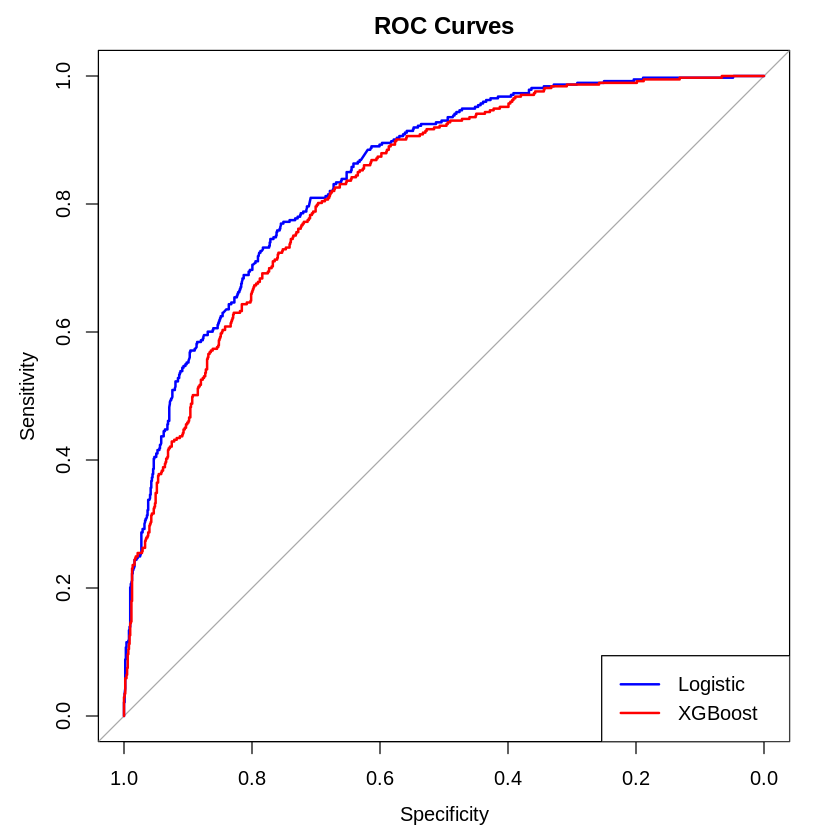

In [20]:
install.packages("pROC")
library(pROC)

# Convert actual to binary
actual_binary <- ifelse(test_data$Churn == "Yes", 1, 0)

# Logistic
roc_log <- roc(actual_binary, log_preds)
auc_log <- auc(roc_log)

# XGBoost
roc_xgb <- roc(actual_binary, xgb_preds)
auc_xgb <- auc(roc_xgb)

# Plot ROC
plot(roc_log, col = "blue", main = "ROC Curves")
lines(roc_xgb, col = "red")
legend("bottomright", legend=c("Logistic", "XGBoost"), col=c("blue", "red"), lwd=2)

cat("AUC Logistic Regression:", auc_log, "\n")
cat("AUC XGBoost:", auc_xgb, "\n")
